# 🧩 Level 12 — Loss Landscape Geometry and Flat Minima Analysis

> **Objective:**  
> To study how different optimizers traverse and settle in the loss landscape —  
> examining curvature, minima sharpness, and their relation to generalization.
>
> This level bridges optimization and statistical learning theory:
> - Visualize 2D and 3D loss surfaces  
> - Compare sharp vs flat minima  
> - Understand why adaptive optimizers (like AdamW + Cosine) generalize better


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [2]:
def sharp_valley(x, y):
    return np.exp(-((x**2)/0.05 + (y**2)/0.2)) + 0.02*(x**2 + y**2)

def flat_valley(x, y):
    return np.exp(-((x**2)/1.2 + (y**2)/1.5)) + 0.02*(x**2 + y**2)


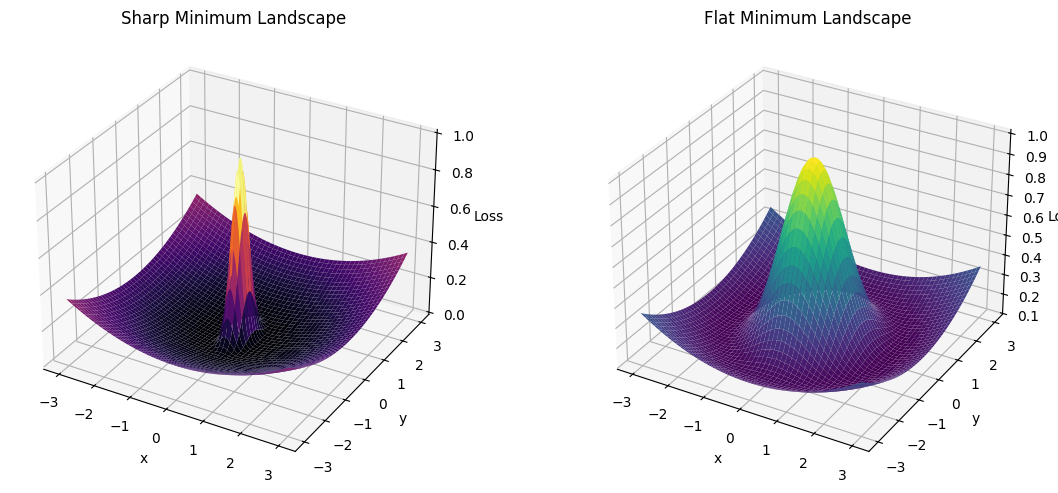

In [3]:
x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)

Z_sharp = sharp_valley(X, Y)
Z_flat = flat_valley(X, Y)

fig, ax = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={"projection": "3d"})

ax[0].plot_surface(X, Y, Z_sharp, cmap="inferno", linewidth=0, antialiased=True)
ax[0].set_title("Sharp Minimum Landscape")
ax[0].set_xlabel("x"); ax[0].set_ylabel("y"); ax[0].set_zlabel("Loss")

ax[1].plot_surface(X, Y, Z_flat, cmap="viridis", linewidth=0, antialiased=True)
ax[1].set_title("Flat Minimum Landscape")
ax[1].set_xlabel("x"); ax[1].set_ylabel("y"); ax[1].set_zlabel("Loss")

plt.tight_layout()
plt.show()


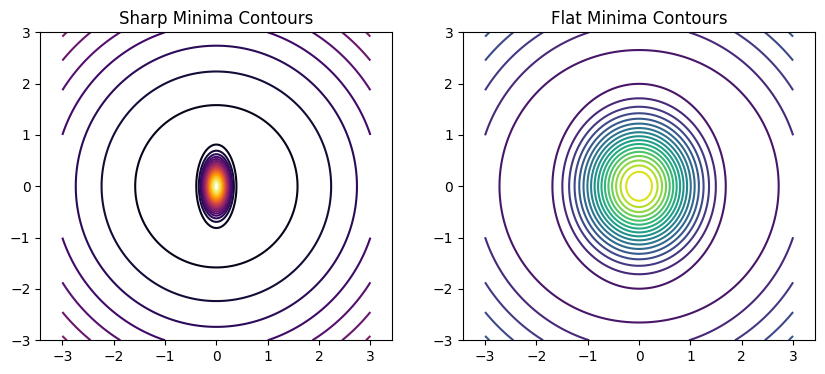

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

cs1 = ax[0].contour(X, Y, Z_sharp, 20, cmap="inferno")
ax[0].set_title("Sharp Minima Contours")
ax[0].axis("equal")

cs2 = ax[1].contour(X, Y, Z_flat, 20, cmap="viridis")
ax[1].set_title("Flat Minima Contours")
ax[1].axis("equal")

plt.show()


## 🧠 Mathematical Insight

A **sharp minimum** occurs where the Hessian \( H = \nabla^2 f(\theta) \)  
has **large eigenvalues**, indicating high curvature:
$$
\text{Sharp Minima: } \lambda_i(H) \gg 0
$$

A **flat minimum** corresponds to small eigenvalues:
$$
\text{Flat Minima: } \lambda_i(H) \approx 0
$$

| Landscape | Curvature | Generalization | Optimizer Bias |
|------------|------------|----------------|----------------|
| **Sharp Minimum** | High | Poor | SGD without momentum, high LR |
| **Flat Minimum** | Low | Good | AdamW + Cosine Annealing / OneCycle |

**Key Idea:**  
- Sharp minima → sensitive to perturbations → overfitting  
- Flat minima → robust to noise → better generalization  

Adaptive methods + dynamic LRs act like **curvature-aware descent** —  
they implicitly bias towards flatter basins.


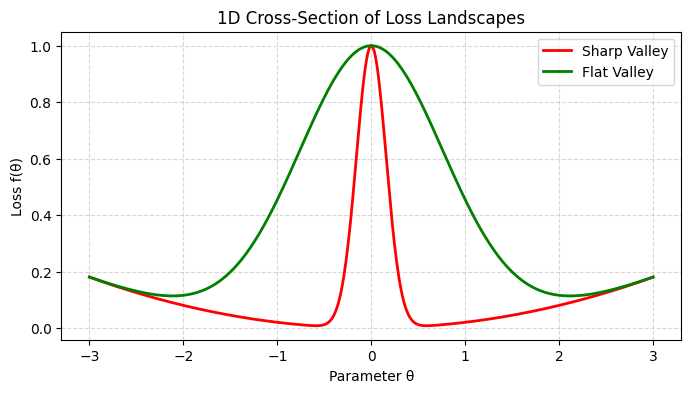

In [5]:
x_line = np.linspace(-3, 3, 500)
z_sharp_line = sharp_valley(x_line, 0)
z_flat_line = flat_valley(x_line, 0)

plt.figure(figsize=(8, 4))
plt.plot(x_line, z_sharp_line, label="Sharp Valley", lw=2, color="red")
plt.plot(x_line, z_flat_line, label="Flat Valley", lw=2, color="green")
plt.title("1D Cross-Section of Loss Landscapes")
plt.xlabel("Parameter θ")
plt.ylabel("Loss f(θ)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## 📊 Interpretation

- Flat minima have **broader valleys** — small parameter changes barely affect loss.  
- Sharp minima have **narrow basins** — tiny perturbations cause large loss spikes.  
- Flat minima → models that generalize better under unseen data.  
- Sharp minima → models that memorize training data (overfitting).  


## 🧭 Takeaway

- Generalization is **geometric** — it depends on the shape of the loss basin.  
- Optimizers like **AdamW**, **OneCycleLR**, and **Cosine Annealing** implicitly prefer flatter minima.  
- Modern AI training isn’t about finding the lowest loss —  
  it’s about finding the **widest, most stable valley** in parameter space.  

> “True optimization is not about minimizing cost —  
> it’s about minimizing *sensitivity*.”
